In [1]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
import scipy.io as sio
import matplotlib.patches as patches
import matplotlib.patches as mpatches



In [2]:
def PlotSSTMap(data, year=None):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(20, 10))

    # Create a colormap
    cmap = plt.get_cmap('seismic')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0  # Maximum value for the color scale

    # Get the shape of the data
    rows, cols = (89,180)
   
     # Loop through each grid point and add a rectangle
#     for row in range(rows):
#         for col in range(cols):
#             rect = mpatches.Rectangle((col, row), 1, 1, linewidth=1, edgecolor='black', facecolor='None')
#             ax.add_patch(rect)
           
    # Plot the average yearly SST data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower', extent=[0, cols, 0, rows])

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Temperature')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Annual Rain Coorelation with SST')
    
    #plt.savefig("Annual Rain Coorelation with SST")
    # Show the plot
    plt.show()
    

In [3]:
rainfall=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\Rainfall Yearly Mean 1901-2022.csv",index_col=0)
sst_grid=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SST Grid Values 1901-2022.csv",index_col=0)

In [4]:
sst_grid

,0x0,0x1,0x2,0x3,0x4,0x5,0x6,0x7,0x8,0x9,...,88x170,88x171,88x172,88x173,88x174,88x175,88x176,88x177,88x178,88x179
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8


In [5]:
correlation_coefficients = sst_grid.corrwith(rainfall.squeeze(), axis=0)


In [6]:
corr_matrix = correlation_coefficients.to_numpy()
corr_matrix = corr_matrix.reshape(89, 180)

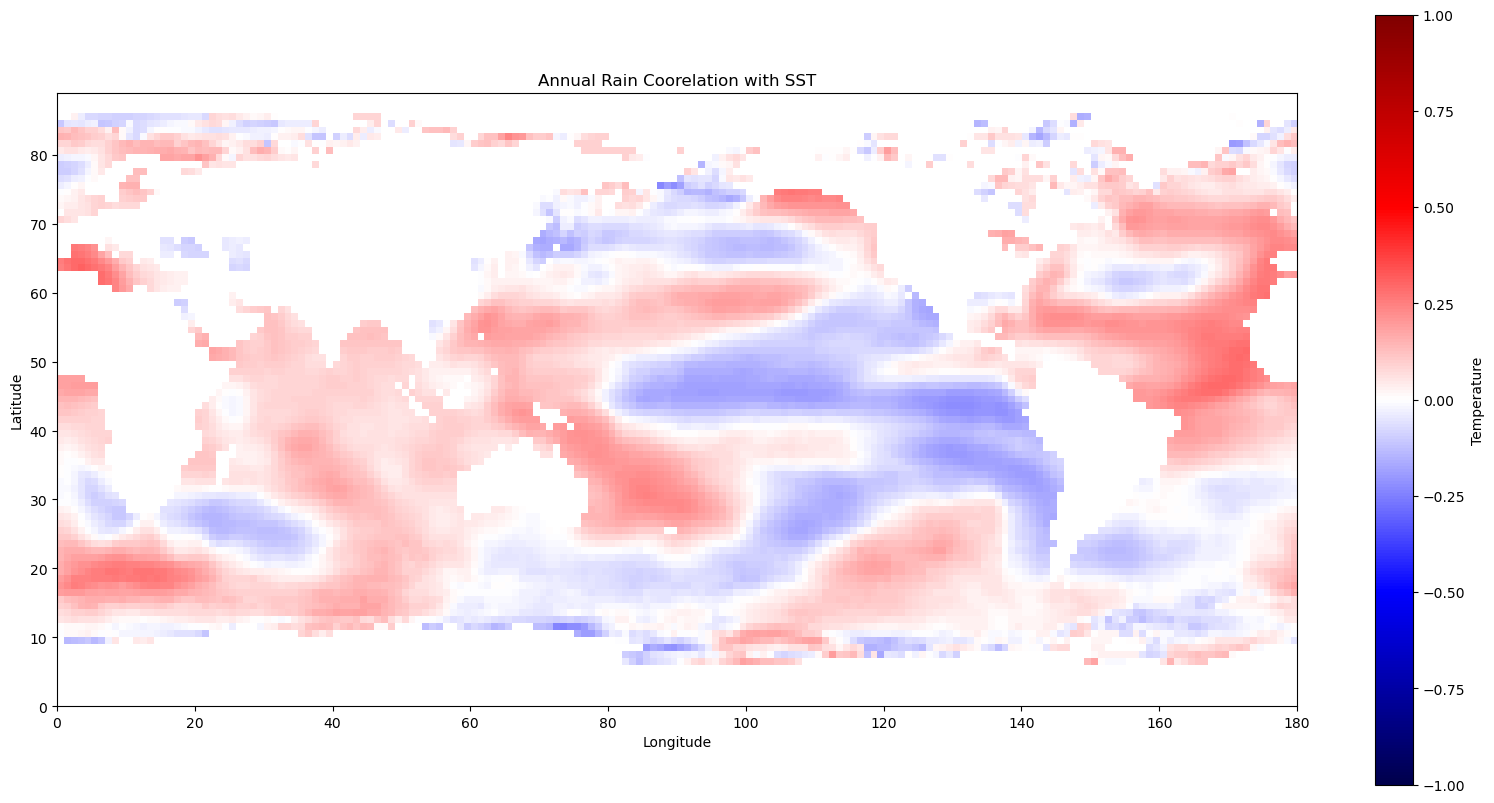

In [7]:
PlotSSTMap(corr_matrix)

In [8]:
print("Max correlation value : ",correlation_coefficients.max())
print("Min correlation value : ",correlation_coefficients.min())

Max correlation value :  0.30635146354972653
Min correlation value :  -0.24804105180776045
